In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import sklearn.metrics as metrics
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor

In [164]:
df = pd.read_csv("dataset-11424.csv")
df.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [165]:
#using label encoder to encode all categorical input feature
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
for feature in ['ShelveLoc', 'Urban', 'US']:
    df[feature] = label_enc.fit_transform(df[feature])
df.head(5)

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          0   42   
1  11.22        111      48           16         260     83          1   65   
2  10.06        113      35           10         269     80          2   59   
3   7.40        117     100            4         466     97          2   55   
4   4.15        141      64            3         340    128          0   38   

   Education  Urban  US  
0         17      1   1  
1         10      1   1  
2         12      1   1  
3         14      1   1  
4         13      1   0

In [166]:
# selecting the appropriate target and input features respectively
y = df["Sales"]
X = df.drop(['Sales'], axis = 1)
# print(X, y)

## (a) Splitting the data

In [6]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

##  (b) Fitting a regressor tree

In [7]:
# initializing and fitting a decision tree regressor on the data
reg_tree = tree.DecisionTreeRegressor()
reg_tree = reg_tree.fit(x_train, y_train)

In [167]:
# obtaining the tree's MSE score
reg_pred = reg_tree.predict(x_test)
# print (accuracy_score(y_test, reg_pred))
print("Mean squared error:", metrics.mean_squared_error(reg_pred, y_test))

Mean squared error: 6.582308333333333


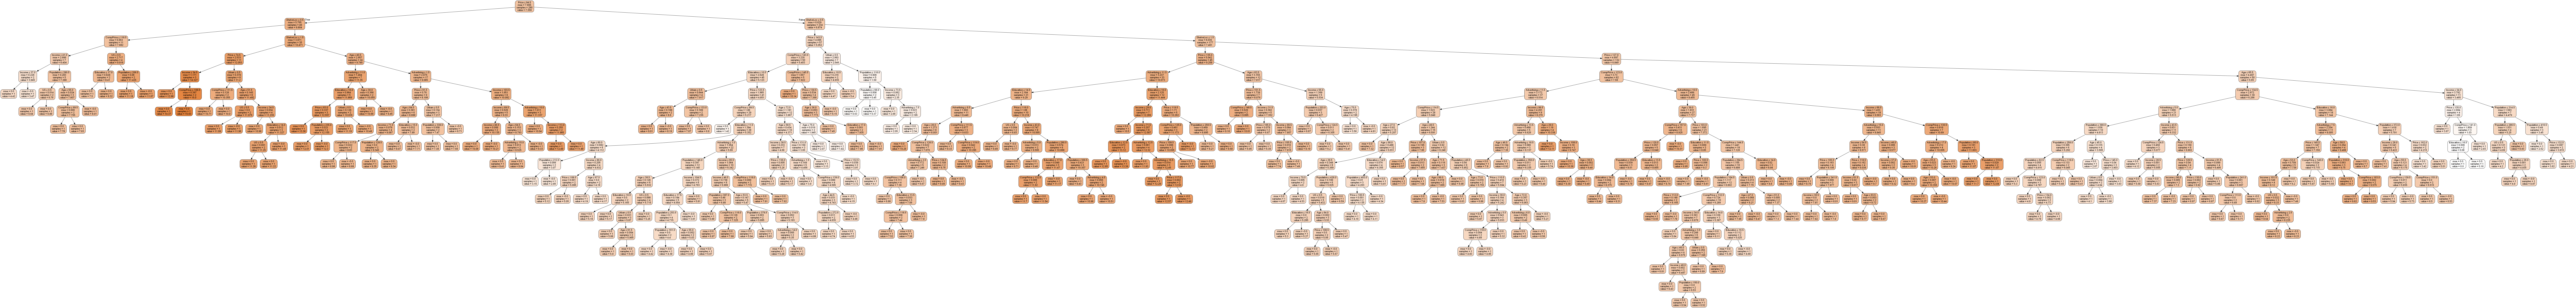

In [16]:
# plotting the regressor tree via graphviz and pydotplus
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

feature_cols = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']

dot_data = StringIO()
export_graphviz(reg_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Sales.png')
Image(graph.create_png())

### Interpretation: The results show that a decision tree regressor when fitted without pruning to the training data produces a MSE score of 6.58

## (c) Using Cross-validation

In [25]:
# using cross validation via gridsearchcv to prune the initial tree
reg_cv_tree = tree.DecisionTreeRegressor()
grid_search = GridSearchCV(reg_cv_tree, 
               param_grid = {'max_depth': range(1, 15), 'min_samples_split': range(10, 60, 10)},
               cv=5,
               n_jobs=1,
               scoring='neg_mean_squared_error')

grid_search = grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 5, 'min_samples_split': 20}
-5.066203899159653


In [168]:
# using the best parameters obtained from gridsearchcv to fit and make predictions on the data
pruned_reg_tree = grid_search.best_estimator_
pruned_reg_pred = pruned_reg_tree.predict(x_test)
# print (accuracy_score(y_test, reg_pred))
print("Mean squared error:", metrics.mean_squared_error(pruned_reg_pred, y_test))


Mean squared error: 4.539567411585438


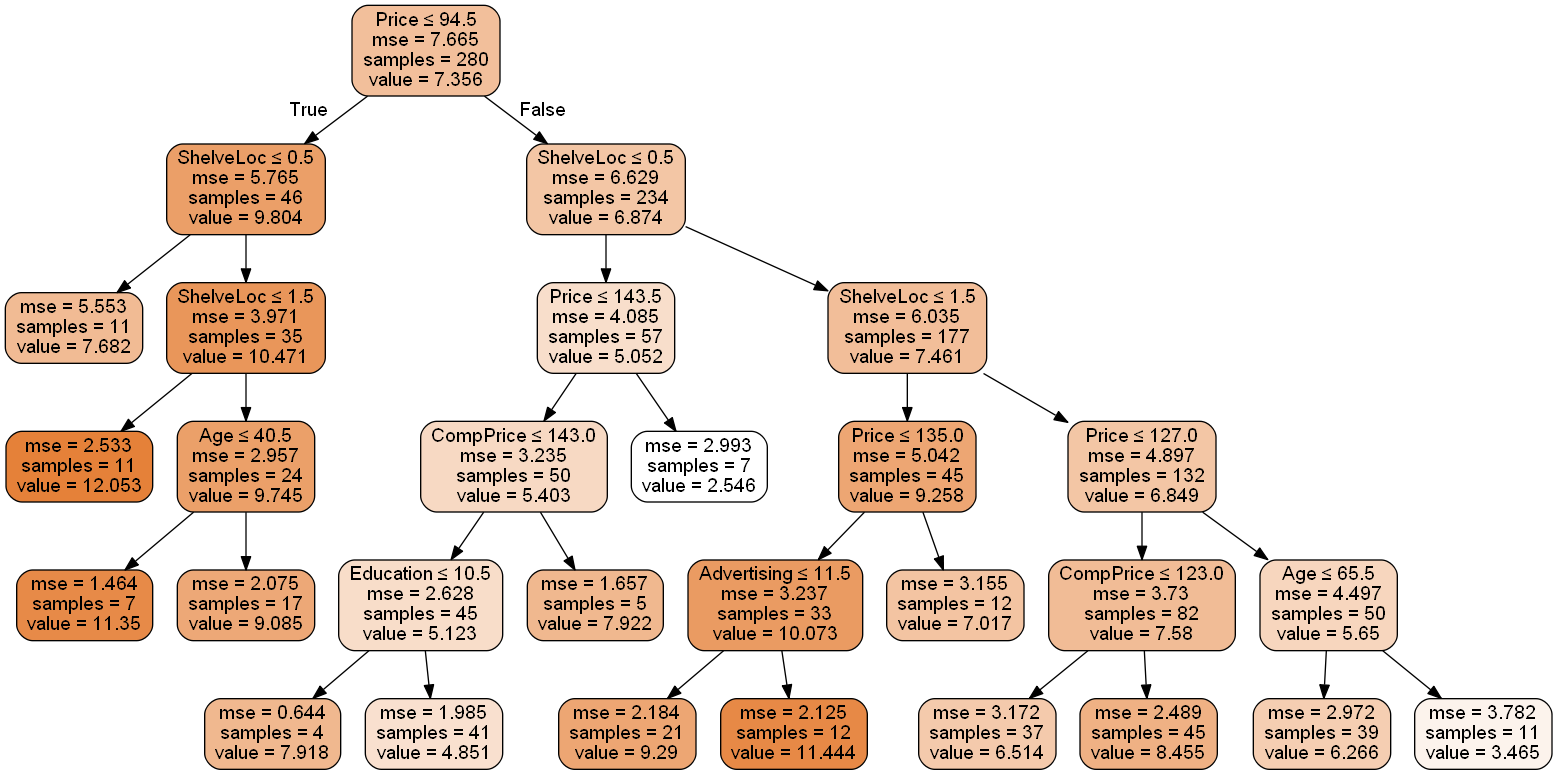

In [27]:
# plotting the pruned tree via graphviz and pydotplus
dot_data = StringIO()
export_graphviz(pruned_reg_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Sales.png')
Image(graph.create_png())

### As can be seen above, pruning the tree results in a much smaller and accurate tree that has an MSE score of 4.54. Therefore, it can be concluded that cross-validation does improve the test MSE

## (d) Using BaggingRegressor

In [29]:
# fitting a bagging regression ensemble to the data
from sklearn.ensemble import BaggingRegressor
bag_tree = BaggingRegressor()
bag_tree = bag_tree.fit(x_train, y_train)

In [169]:
# obtaining the prediction and MSE score of the bagging model
bag_pred = bag_tree.predict(x_test)
# print (accuracy_score(y_test, reg_pred))
print("Mean squared error:", metrics.mean_squared_error(bag_pred, y_test))

Mean squared error: 3.408286575


### MSE - improved to 3.41

## (e) Using Random Forest

In [36]:
# fitting a Random forest regression ensemble to the data
rf_tree = RandomForestRegressor()
rf_tree = rf_tree.fit(x_train, y_train)

In [170]:
# obtaining the prediction and MSE score of the Random forest model
rf_pred = rf_tree.predict(x_test)
# print (accuracy_score(y_test, reg_pred))
print("Mean squared error:", metrics.mean_squared_error(rf_pred, y_test))

Mean squared error: 2.753896087


### MSE - improved to 2.75

# Demonstrating the limits of the K-Means Clustering model

In [105]:
df = pd.read_csv("Fish.csv")
df.head()

Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340

In [106]:
# one hot encodinght the species feature
df["species_encoded"] = label_enc.fit_transform(df['Species'])
true_label = df["species_encoded"]
df = df.drop(["Species"], axis=1)

# normalizing the data
scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)
# X = df

In [160]:
# fitting a Kmeans cluster model to the data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, random_state=43)
labels = kmeans.fit_predict(X)

In [162]:
# function to return model accuracy by comparing it with the species_encoded feature which is the true label
def get_accuracy(y_pred, y):
    accuracy = float(sum(y_pred == y))/ float(len(y))
    return(accuracy)
score =get_accuracy(labels, true_label)
print(score)

0.31446540880503143


#### The results show that the K-Means algorithm clusters are only 32% accurate in properly grouping the fish data samples to their correct specie class, which is not an impressive score. However, It may be possible that the algorithm has clustered the fishes based on other more obvious features like length, width, height or overall size. 